# ЛР №1

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline

### Загрузка данных

In [2]:
happy_data = pd.read_csv('reddit_wsb.csv', sep = ',' )

## 2)Основные характеристики датасета

In [3]:
# Первые пять строк датасета
happy_data.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [4]:
# Размер датасета
happy_data.shape

(36520, 8)

In [5]:
# Количество нулевых элементов
happy_data.isnull().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         18048
timestamp        0
dtype: int64

In [6]:
 # Колонки и их типы данных
happy_data.dtypes

title         object
score          int64
id            object
url           object
comms_num      int64
created      float64
body          object
timestamp     object
dtype: object

In [7]:
# Описание датасета
happy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36520 entries, 0 to 36519
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      36520 non-null  object 
 1   score      36520 non-null  int64  
 2   id         36520 non-null  object 
 3   url        36520 non-null  object 
 4   comms_num  36520 non-null  int64  
 5   created    36520 non-null  float64
 6   body       18472 non-null  object 
 7   timestamp  36520 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.2+ MB


In [8]:
# Статистические данные
happy_data.describe()

,score,comms_num,created
count,36520.000000,36520.000000,3.652000e+04
mean,1224.997700,164.866046,1.612316e+09
std,8272.922526,2166.834418,6.328753e+05
min,0.000000,0.000000,1.601340e+09
25%,1.000000,1.000000,1.611879e+09
50%,15.000000,9.000000,1.612035e+09
75%,138.000000,38.000000,1.612528e+09
max,348241.000000,89050.000000,1.614447e+09


In [9]:
# Удаляем столбец id
happy_data = happy_data.drop('id', axis = 1)

In [10]:
# Первые пять строк датасета
happy_data.head()

,title,score,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [11]:
# Определим уникальные значения для целевого признака
happy_data['score'].unique()

array([   55,   110,     0, ..., 83582,  1289, 37242])

## 3) Визуальное исследование датасета

array([[<AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'comms_num'}>],
       [<AxesSubplot:title={'center':'created'}>, <AxesSubplot:>]],
      dtype=object)

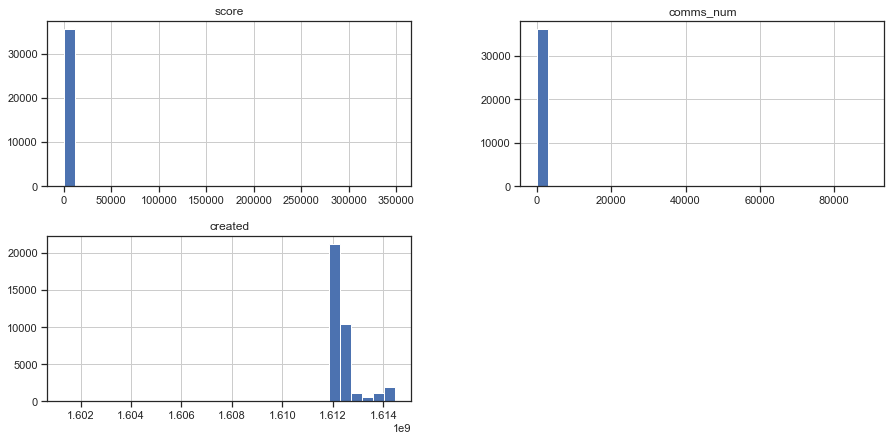

In [12]:
# Гистограммы для всех признаков
happy_data.hist(bins=30, figsize = (15,7))

<Figure size 864x432 with 0 Axes>

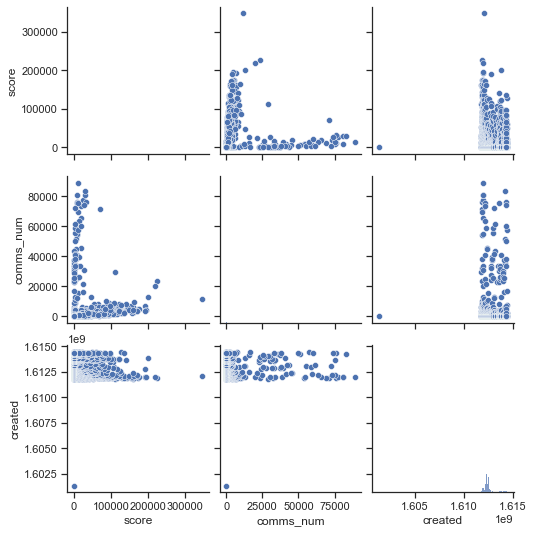

In [13]:
# Диаграммы рассеяние для всех признаков
plt.figure(figsize=(12,6))
sns.pairplot(happy_data)

<AxesSubplot:xlabel='comms_num'>

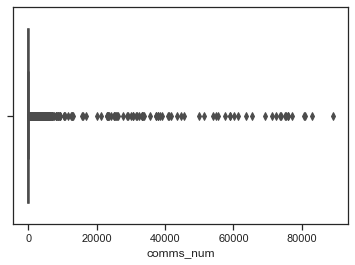

In [14]:
# Одномерное распределение вероятности
sns.boxplot(x=happy_data['comms_num'])

<AxesSubplot:xlabel='comms_num'>

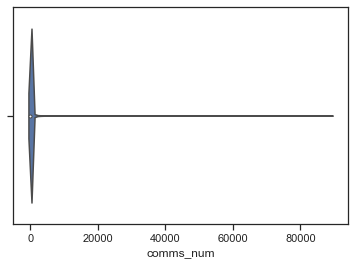

In [15]:
sns.violinplot(x=happy_data['comms_num'])

## 4) Корреляции признаков

In [16]:
corr_matrix = happy_data.corr()

In [17]:
corr_matrix['created']

score        0.072981
comms_num    0.057357
created      1.000000
Name: created, dtype: float64

<AxesSubplot:>

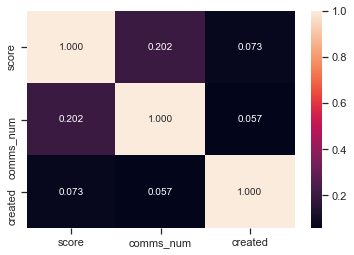

In [18]:
sns.heatmap(happy_data.corr(), annot=True, fmt='.3f')